<h1>Predict Loan Eligibility for Dream Housing Finance company</h1>
<p>
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
</p>
<p>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 
</p>

<ul>
    <li>Variable: Description</li>
    <li>Loan_ID: Unique Loan ID</li>
    <li>Gender: Male/ Female</li>
    <li>Married: Applicant married (Y/N)</li>
    <li>Dependents: Number of dependents</li>
    <li>Education: Applicant Education (Graduate/ Under Graduate)</li>
    <li>Self_Employed: Self employed (Y/N)</li>
    <li>ApplicantIncome: Applicant income</li>
    <li>CoapplicantIncome: Coapplicant income</li>
    <li>LoanAmount: Loan amount in thousands</li>
    <li>Loan_Amount_Term: Term of loan in months</li>
    <li>Credit_History: credit history meets guidelines</li>
    <li>Property_Area:  Urban/ Semi Urban/ Rural</li>
    <li>Loan_Status: (Target) Loan approved (Y/N)</li>
</ul>


In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn import tree
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import pickle


<h2>Train Data</h2>

In [2]:
loan_train_df=pd.read_csv('train_ctrUa4k.csv')


<h3>Data Exploration</h3>

In [3]:
loan_train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_train_df.shape


(614, 13)

In [5]:
loan_train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan_train_df.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_train_df = loan_train_df.drop(['Loan_ID'], axis=1)
loan_train_df



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


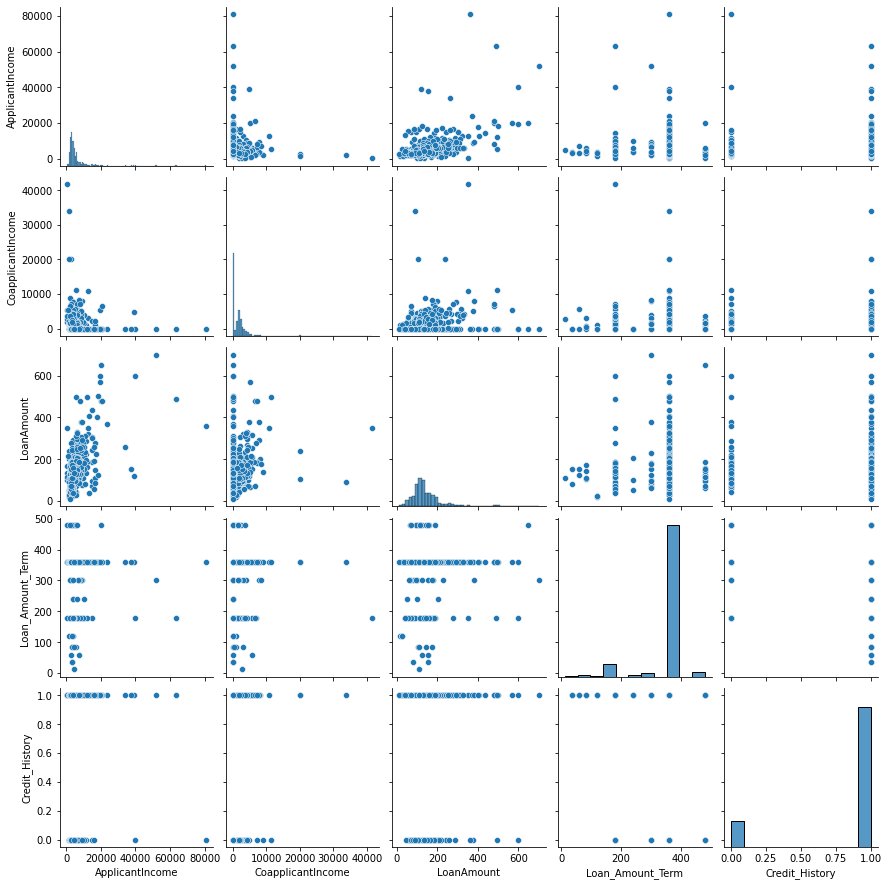

In [9]:
sns.pairplot(loan_train_df)

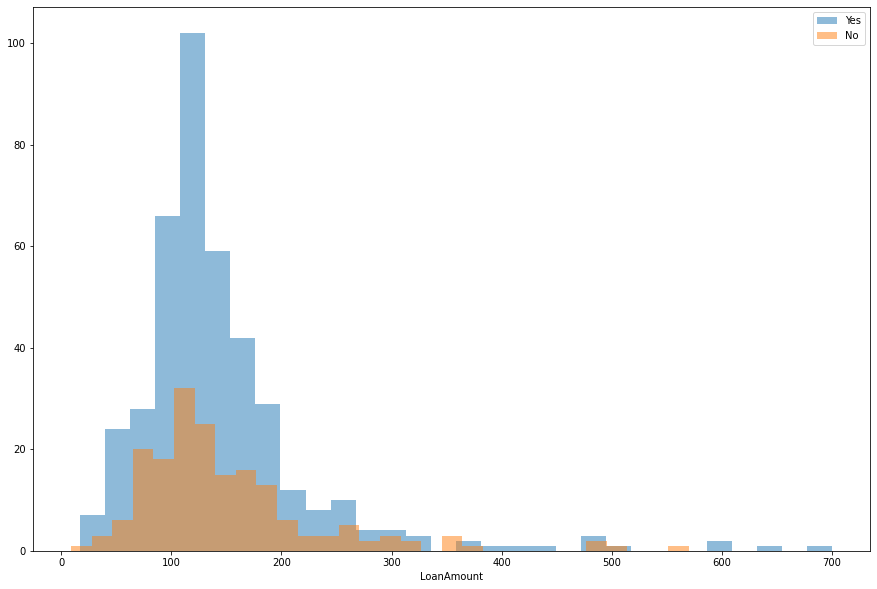

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

ax.hist(loan_train_df.query('Loan_Status == "Y"')['LoanAmount'], label='Yes', bins=30, alpha=0.5)
ax.hist(loan_train_df.query('Loan_Status == "N"')['LoanAmount'], label='No', bins=30, alpha=0.5)

ax.set_xlabel('LoanAmount')
ax.legend()

plt.show()

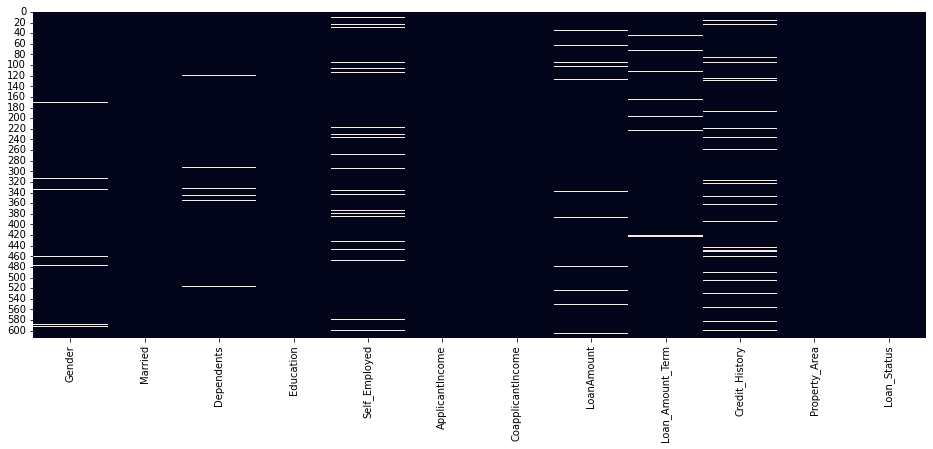

In [11]:
plt.figure(figsize=(16, 6))
sns.heatmap(loan_train_df.isnull(), cbar=False);

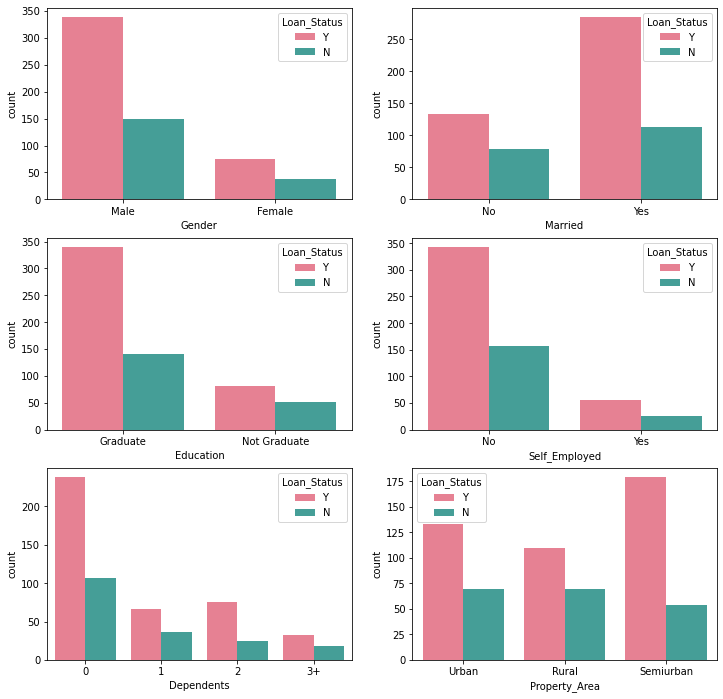

In [12]:
groups = ['Gender','Married','Education','Self_Employed','Dependents','Property_Area']
fig, ax = plt.subplots(3,2, figsize = (12,12))
axs=ax.ravel()
for i, group in enumerate(groups):
    sns.countplot(x = group, hue = 'Loan_Status',ax=axs[i], data=loan_train_df,palette="husl")

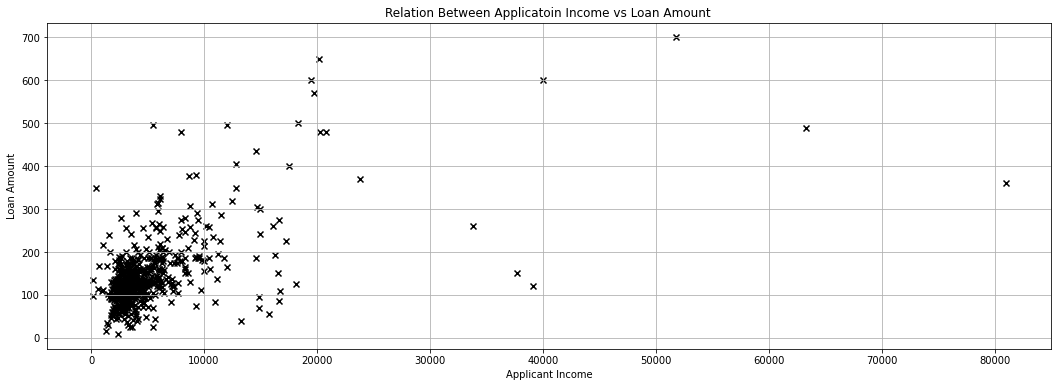

In [13]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train_df['ApplicantIncome'] , loan_train_df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

<h3> Data Preprocessing</h3>
<ul>
<li>Convert Categorical Data</li>
<li>Convert Data Types</li>
<li>Dropping non-essential features</li>
<li>Resolving Nan values</li>
<li>Identifying / Resolving Outliers</li>
<li>Saving Clean Data</li>
</ul>


In [14]:
loan_train_df.loc[(loan_train_df['Loan_Amount_Term'] >= 180), 'loan_term_dummy'] = 1
loan_train_df.loan_term_dummy.fillna(0,inplace=True)




In [15]:
loan_train_df = loan_train_df.drop(['Loan_Amount_Term'], axis=1)
loan_train_df.Gender = loan_train_df.Gender.replace({"Male": 1, "Female" : 0})


In [16]:
loan_train_df.LoanAmount.fillna(loan_train_df.LoanAmount.mean(),inplace=True)



In [17]:
loan_train_df.Loan_Status = loan_train_df.Loan_Status.replace({"Y": 1, "N" : 0})
loan_train_df.Married = loan_train_df.Married.replace({"Yes": 1, "No" : 0})
loan_train_df.Self_Employed = loan_train_df.Self_Employed.replace({"Yes": 1, "No" : 0})



In [18]:
loan_train_df.Dependents.fillna(loan_train_df.Dependents.mode()[0], inplace=True)
loan_train_df.Married.fillna(loan_train_df.Married.mode()[0], inplace=True)
loan_train_df.Credit_History.fillna(loan_train_df.Credit_History.mean(), inplace=True)
loan_train_df.Self_Employed.fillna(loan_train_df.Self_Employed.mode()[0], inplace=True)
loan_train_df.loan_term_dummy.fillna(loan_train_df.loan_term_dummy.mean(), inplace=True)
loan_train_df['Gender'].fillna(loan_train_df['Gender'].mode()[0], inplace=True)


In [19]:
loan_train_df['Credit_History'] = loan_train_df['Credit_History'].astype(int)
loan_train_df['Self_Employed'] = loan_train_df['Self_Employed'].astype(int)
loan_train_df['Married'] = loan_train_df['Married'].astype(int)
loan_train_df['loan_term_dummy'] = loan_train_df['loan_term_dummy'].astype(int)
loan_train_df['Gender']=loan_train_df['Gender'].astype(int)


In [20]:
EncodedFeatures=['Property_Area','Education','Dependents']
le = LabelEncoder()
for feature in EncodedFeatures:
    loan_train_df[feature]=le.fit_transform(loan_train_df[feature])


In [21]:
loan_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Credit_History     614 non-null    int64  
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  loan_term_dummy    614 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 57.7 KB


In [22]:
loan_train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,loan_term_dummy
0,1,0,0,0,0,5849,0.0,146.412162,1,2,1,1
1,1,1,1,0,0,4583,1508.0,128.000000,1,0,0,1
2,1,1,0,0,1,3000,0.0,66.000000,1,2,1,1
3,1,1,0,1,0,2583,2358.0,120.000000,1,2,1,1
4,1,0,0,0,0,6000,0.0,141.000000,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,1,0,1,1
610,1,1,3,0,0,4106,0.0,40.000000,1,0,1,1
611,1,1,1,0,0,8072,240.0,253.000000,1,2,1,1
612,1,1,2,0,0,7583,0.0,187.000000,1,2,1,1


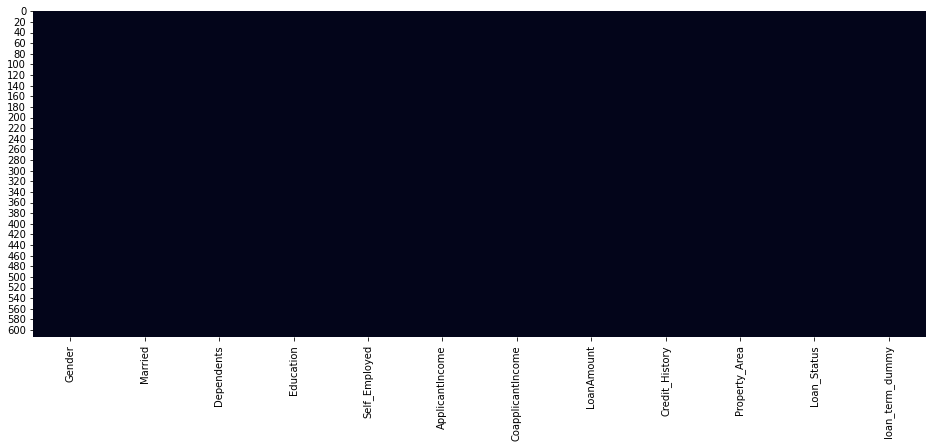

In [23]:
plt.figure(figsize=(16, 6))
sns.heatmap(loan_train_df.isnull(), cbar=False);

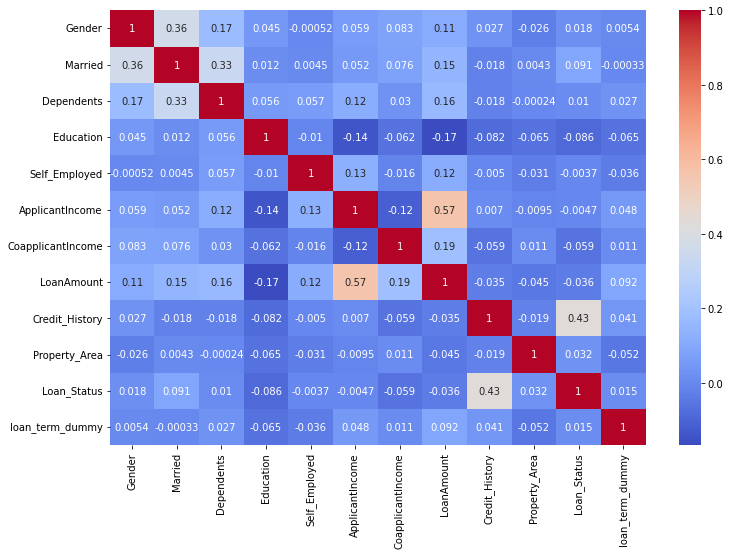

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train_df.corr(), cmap='coolwarm', annot=True)
plt.show()

Text(0.5, 1.0, 'Comparing Credit History with Loan Status')

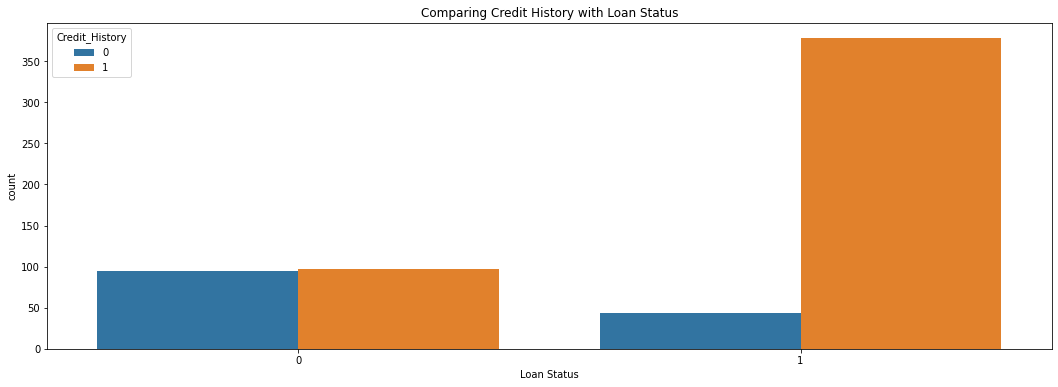

In [25]:
plt.figure(figsize = (18,6))
sns.countplot(x='Loan_Status', hue='Credit_History',data=loan_train_df);
plt.xlabel("Loan Status")
plt.title("Comparing Credit History with Loan Status")

In [26]:

#cont_df.drop(['3+','2','1','Urban','Semiurban', 'Loan_Status','Self_Employed','Education','Married','Gender','Credit_History'], axis=1, inplace=True)

Q1 = loan_train_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','loan_term_dummy']].quantile(0.25)
Q3 = loan_train_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','loan_term_dummy']].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             64.50
loan_term_dummy         0.00
dtype: float64


<AxesSubplot:xlabel='ApplicantIncome'>

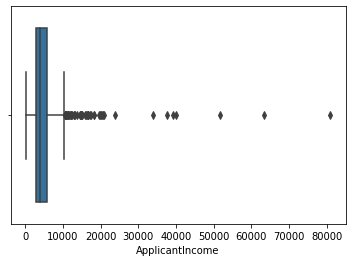

In [27]:
sns.boxplot(x=loan_train_df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

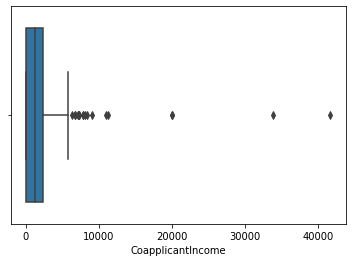

In [28]:
sns.boxplot(x=loan_train_df['CoapplicantIncome'])

<AxesSubplot:xlabel='loan_term_dummy'>

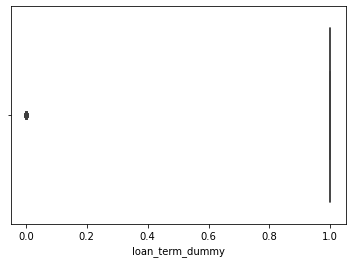

In [29]:
sns.boxplot(x=loan_train_df['loan_term_dummy'])

<AxesSubplot:xlabel='LoanAmount'>

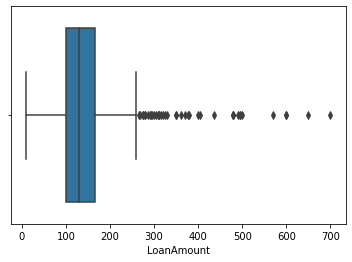

In [30]:

sns.boxplot(x=loan_train_df['LoanAmount'])

In [31]:
loan_train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
loan_term_dummy      0
dtype: int64

In [32]:
loan_train_df.to_pickle('cleaned_data_loan.pkl')

In [33]:
X = loan_train_df[['Gender','Married', 'Dependents', 'Education', 'Self_Employed','CoapplicantIncome','ApplicantIncome', 'LoanAmount','Credit_History', 'Property_Area', 'loan_term_dummy']]
y = loan_train_df['Loan_Status']



<h2> Handle inbalanced data with SMOTE</h2>

In [34]:
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X,y)

y_smote.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [35]:
scaler=StandardScaler()
X_smote=scaler.fit_transform(X_smote)

In [36]:
X_smote_train,X_smote_test,y_smote_train,y_smote_test=train_test_split(X_smote,y_smote,test_size=0.33,random_state=2)

<h2>Model 1 - Decision Tree</h2>

In [37]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_smote_train, y_smote_train)

DecisionTreeClassifier(random_state=1)

In [38]:
dtree_pred=dtree.predict(X_smote_test)
print(f"Accuracy Score: {accuracy_score(y_smote_test, dtree_pred) * 100:.2f}%")

Accuracy Score: 75.27%


In [39]:
print(classification_report(y_smote_test, dtree_pred))
dtree_matrix=confusion_matrix(y_smote_test, dtree_pred)

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       136
           1       0.80      0.69      0.74       143

    accuracy                           0.75       279
   macro avg       0.76      0.75      0.75       279
weighted avg       0.76      0.75      0.75       279



In [40]:
df_matrix=pd.DataFrame(dtree_matrix, 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
# We can set the background as well!
df_matrix.style.background_gradient(cmap='Greens')

,Predicted False,Predicted True
Actual False,111,25
Actual True,44,99


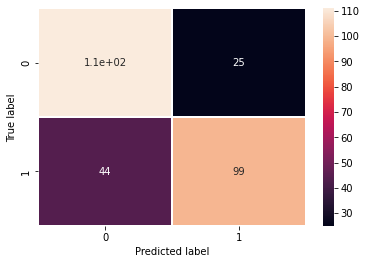

In [41]:
sns.heatmap(dtree_matrix, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [42]:
dot_data = export_graphviz(
    dtree,
    out_file = None,
    feature_names = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed','CoapplicantIncome','ApplicantIncome', 'LoanAmount','Credit_History', 'Property_Area', 'loan_term_dummy'],
    class_names = 'Loan_Status',
    rounded = True,
    filled = True,
    max_depth=5
)

<h3>Tree Visualization for Decison Tree model </h3>

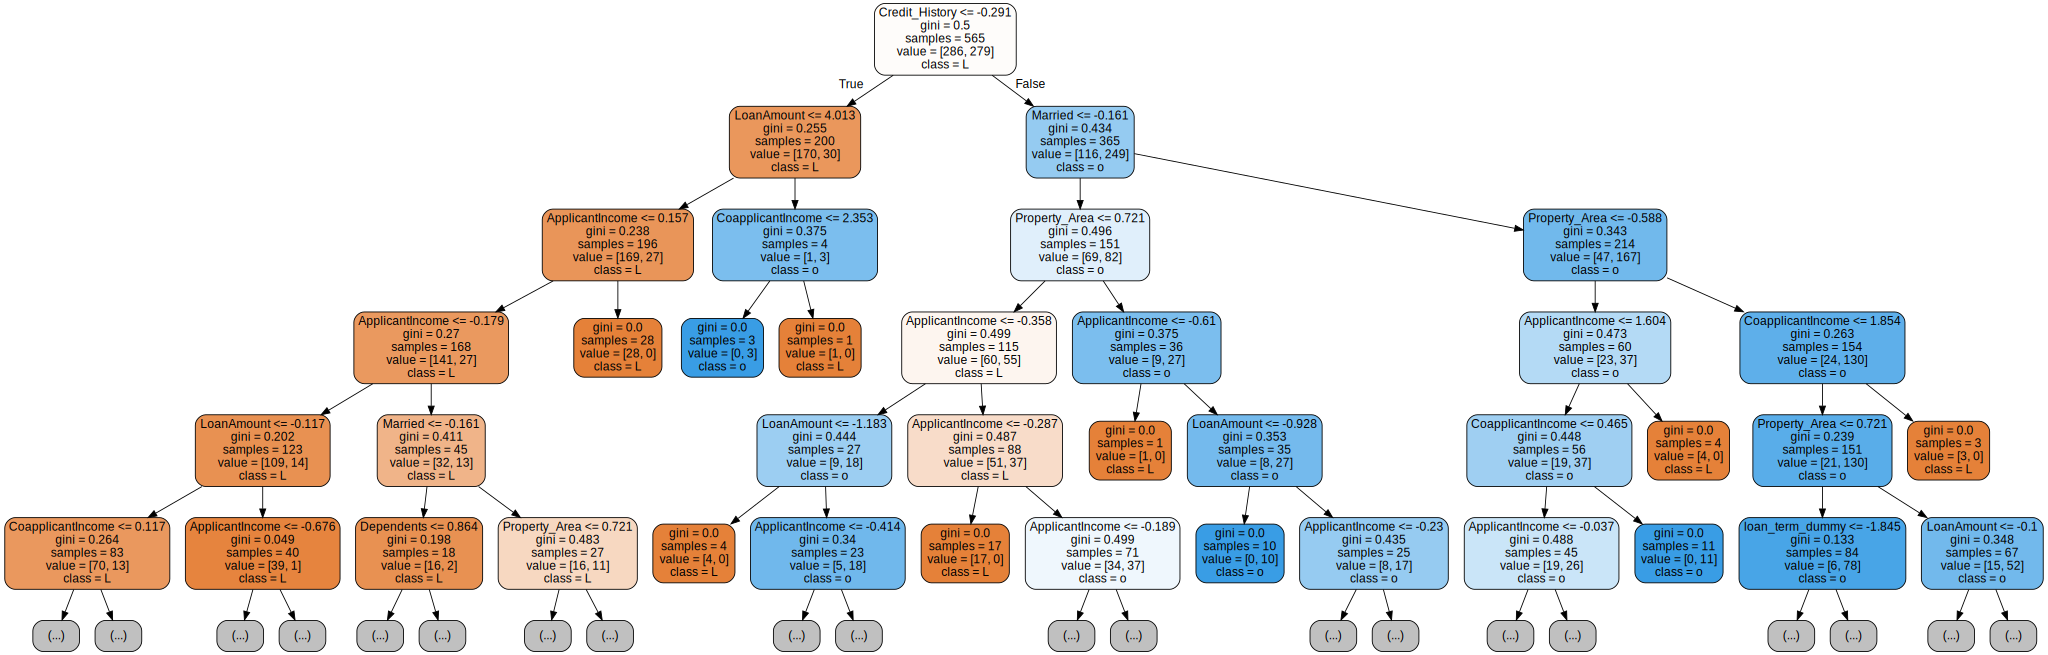

In [43]:
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Loan_train_dtree.png')
graph = graphviz.Source(dot_data)
graph

<h3>Feature Importance</h3>

In [44]:
def feature_plot(coef, columns, y_title = 'coefficients'):
    feature_imp = pd.DataFrame(coef.T, columns = ['importance'])
    feature_imp['feature'] = columns
    feature_imp.sort_values(by = ['importance'], ascending = False, inplace = True)
    feature_imp.plot(x='feature', kind = 'bar', figsize = (16,4))
    plt.title(y_title)
    plt.ylabel(y_title);

In [45]:
features_names=loan_train_df.columns[:-1]
features_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [46]:
dtree.feature_importances_

array([0.01450189, 0.0420215 , 0.03812034, 0.02077073, 0.02544983,
       0.11324572, 0.27520733, 0.15609982, 0.25911285, 0.05140593,
       0.00406406])

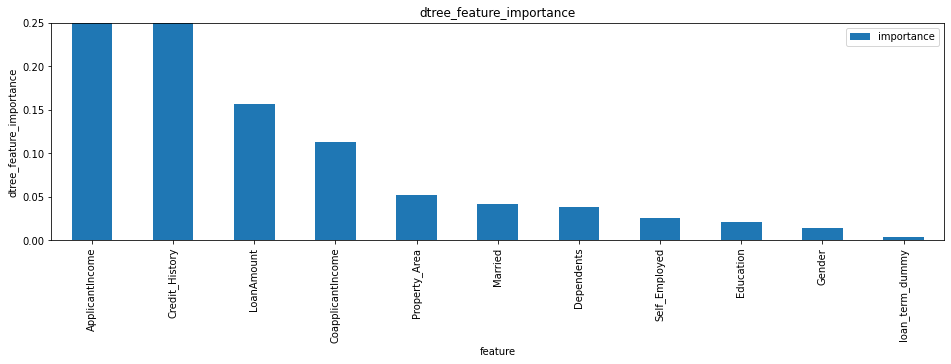

In [47]:
feature_plot(coef = dtree.feature_importances_, columns =['Gender','Married', 'Dependents', 'Education', 'Self_Employed','CoapplicantIncome','ApplicantIncome', 'LoanAmount','Credit_History', 'Property_Area', 'loan_term_dummy'],
             y_title = 'dtree_feature_importance')
plt.ylim(0,0.25);

<h2> Model 2 - Random Forest</h2>

In [48]:
forest = RandomForestClassifier(n_estimators=100,random_state=1)
forest.fit(X_smote_train,y_smote_train)

RandomForestClassifier(random_state=1)

In [49]:
y_pred = forest.predict(X_smote_test)
print(f"Accuracy Score: {accuracy_score(y_smote_test, y_pred) * 100:.2f}%")

Accuracy Score: 81.00%


In [50]:
print(classification_report(y_smote_test, y_pred))
rf_matrix=confusion_matrix(y_smote_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       136
           1       0.83      0.79      0.81       143

    accuracy                           0.81       279
   macro avg       0.81      0.81      0.81       279
weighted avg       0.81      0.81      0.81       279



In [51]:
df_matrix=pd.DataFrame(rf_matrix, 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])

df_matrix.style.background_gradient(cmap='Greens')

,Predicted False,Predicted True
Actual False,113,23
Actual True,30,113


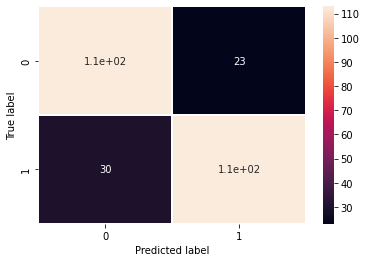

In [52]:
sns.heatmap(rf_matrix, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [53]:
single_tree = forest.estimators_[5]

In [54]:
dot_data=export_graphviz(
    single_tree, 
    out_file=None, 
    feature_names=['Gender','Married', 'Dependents', 'Education', 'Self_Employed','CoapplicantIncome','ApplicantIncome', 'LoanAmount','Credit_History', 'Property_Area', 'loan_term_dummy'], 
    filled=True,
    rounded=True,
    max_depth=5)

<h3>Tree Visualization for Random Forest Model</h3>

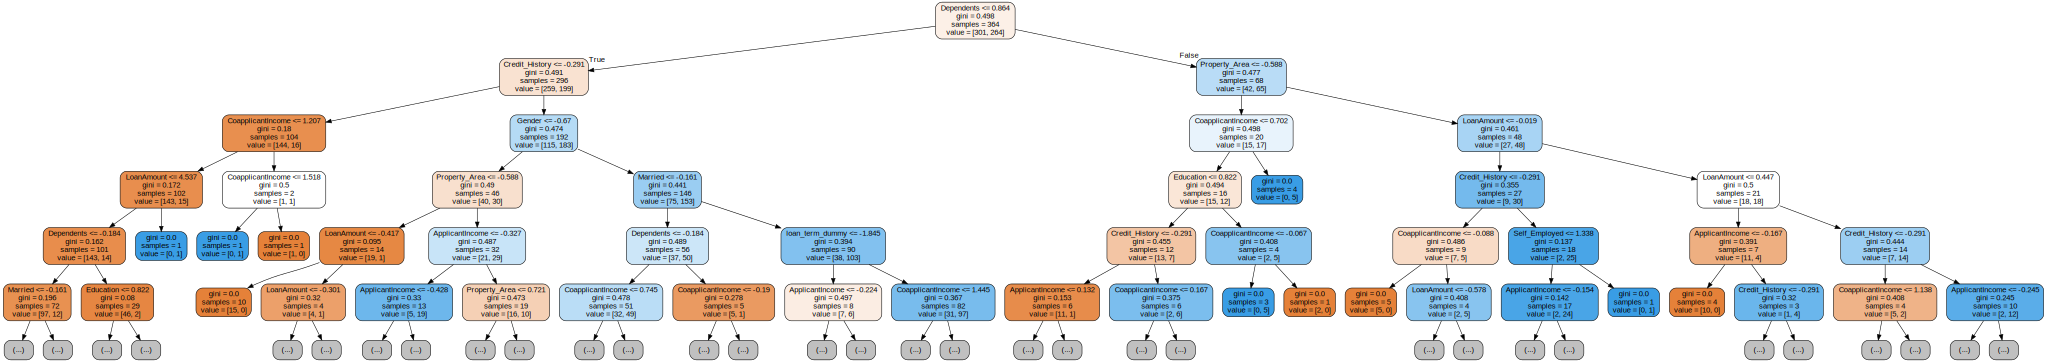

In [55]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Loan_train_rf.png') 
graph = graphviz.Source(dot_data)
graph

<h3>Feature Importance</h3>

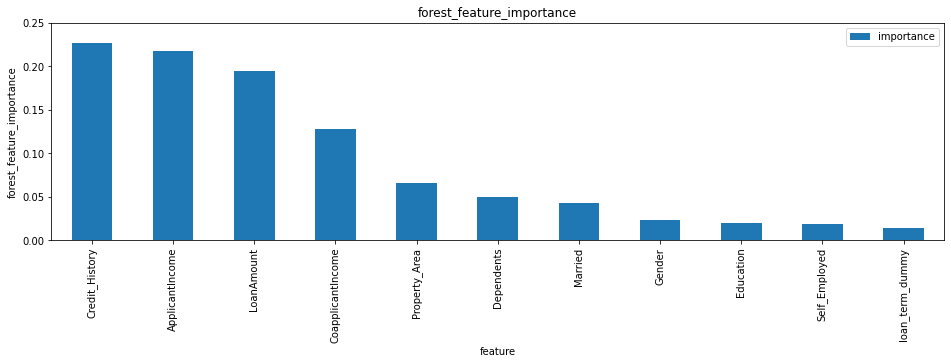

In [56]:
feature_plot(coef = forest.feature_importances_, columns =['Gender','Married', 'Dependents', 'Education', 'Self_Employed','CoapplicantIncome','ApplicantIncome', 'LoanAmount','Credit_History', 'Property_Area', 'loan_term_dummy'], 
             y_title = 'forest_feature_importance')
plt.ylim(0,0.25);

<h3>Random Forest has the best score but lets see if it increses if we do hyperparameter tuning with Randomized Search and Grid Seach CV

<h3>Randomized Search</h3>

In [57]:
rfc_RS = RandomForestClassifier(n_estimators=20,random_state=0) 

In [58]:
param_distributions = {"max_depth": [2, 3],
                       "max_features": randint(1, 13), 
                       "min_samples_split": randint(2, 13),
                       "criterion": ["gini", "entropy"]}

In [59]:
n_iter_search = 15 

In [60]:
random_search_rfc = RandomizedSearchCV(rfc_RS, param_distributions=param_distributions, 
                                   n_iter=n_iter_search, cv=5)

In [61]:
random_search_rfc.fit(X_smote_train, y_smote_train) 

/Users/Tam/Desktop/DataScience/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Tam/Desktop/DataScience/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Tam/Desktop/DataScience/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 441, in fit
    trees = Parallel(
  File "/Users/Tam/Desktop/DataScience/.venv/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if se

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=20,
                                                    random_state=0),
                   n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f83877bac40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f83863dd0d0>})

In [62]:
random_search_rfc.best_score_

0.7610619469026549

In [63]:
random_search_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=4,
                       min_samples_split=11, n_estimators=20, random_state=0)

In [64]:
random_search_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 4,
 'min_samples_split': 11}

In [65]:

def print_report(search_results, top_n = 2):
    for i in range(1, top_n + 1):
    
        rank = np.flatnonzero(search_results['rank_test_score'] == i)

        for val in rank: 
            print("Model rank: ", i)
            print("Mean validation score: {:.3f}".format(search_results['mean_test_score'][val]))
            print("std_test_score: {:.3f}".format(search_results['std_test_score'][val]))
            print("Parameters: {}\n".format(format(search_results['params'][val])))

In [66]:
print_report(random_search_rfc.cv_results_, 3)

Model rank:  1
Mean validation score: 0.761
std_test_score: 0.042
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_split': 11}

Model rank:  2
Mean validation score: 0.752
std_test_score: 0.039
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 11, 'min_samples_split': 4}

Model rank:  2
Mean validation score: 0.752
std_test_score: 0.038
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_split': 4}

Model rank:  2
Mean validation score: 0.752
std_test_score: 0.038
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_split': 11}

Model rank:  2
Mean validation score: 0.752
std_test_score: 0.038
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_split': 4}



In [67]:
with open('best_params_loan_train.txt', 'w') as f:
    f.write(str(random_search_rfc.best_params_))

In [68]:
import ast 
with open('best_params_loan_train.txt', 'r') as f:
    best_parameters = ast.literal_eval(f.read())

In [69]:
random_search_rfc_pred = random_search_rfc.predict(X_smote_test)
print(f"Accuracy Score: {accuracy_score(y_smote_test, random_search_rfc_pred) * 100:.2f}%")

Accuracy Score: 79.57%


In [70]:
rf_RS_matrix=confusion_matrix(y_smote_test, random_search_rfc_pred)
print(classification_report(y_smote_test, random_search_rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       136
           1       0.76      0.87      0.81       143

    accuracy                           0.80       279
   macro avg       0.80      0.79      0.79       279
weighted avg       0.80      0.80      0.79       279



In [71]:
df_matrix=pd.DataFrame(rf_RS_matrix, 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])

df_matrix.style.background_gradient(cmap='Greens')

,Predicted False,Predicted True
Actual False,97,39
Actual True,18,125


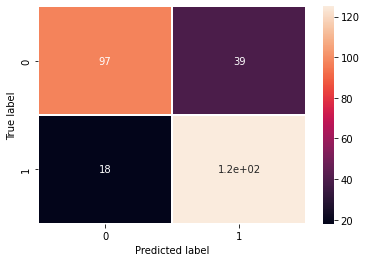

In [72]:
sns.heatmap(rf_RS_matrix, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

<h3>Grid Search</h3>

In [73]:
rfc_GS = RandomForestClassifier(n_estimators=20)

In [74]:
param_grid = {"max_depth": [2, 3],
              "max_features": [3, 5, 13],
              "min_samples_split": [2, 3, 13],
              "criterion": ["gini", "entropy"]}

In [75]:
grid_search_rfc = GridSearchCV(rfc_GS, param_grid=param_grid, cv=5)
grid_search_rfc.fit(X_smote_train, y_smote_train)

/Users/Tam/Desktop/DataScience/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Tam/Desktop/DataScience/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Tam/Desktop/DataScience/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 441, in fit
    trees = Parallel(
  File "/Users/Tam/Desktop/DataScience/.venv/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=20),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'max_features': [3, 5, 13],
                         'min_samples_split': [2, 3, 13]})

In [76]:
print("Best score:", round((grid_search_rfc.best_score_),3))
print("Best params:", grid_search_rfc.best_params_)

Best score: 0.77
Best params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 13}


In [77]:
grid_search_rfc_pred = grid_search_rfc.predict(X_smote_test)
print(f"Accuracy Score: {accuracy_score(y_smote_test, grid_search_rfc_pred) * 100:.2f}%")

Accuracy Score: 78.85%


In [78]:
rf_GS_matrix=confusion_matrix(y_smote_test, grid_search_rfc_pred)
print(classification_report(y_smote_test, grid_search_rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       136
           1       0.77      0.85      0.80       143

    accuracy                           0.79       279
   macro avg       0.79      0.79      0.79       279
weighted avg       0.79      0.79      0.79       279



In [79]:
df_matrix=pd.DataFrame(rf_GS_matrix, 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])

df_matrix.style.background_gradient(cmap='Greens')

,Predicted False,Predicted True
Actual False,99,37
Actual True,22,121


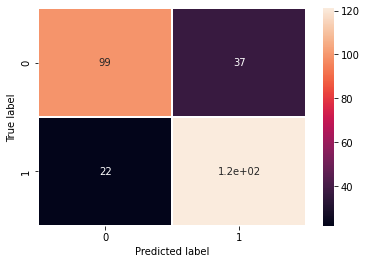

In [80]:
sns.heatmap(rf_GS_matrix, annot=True, linewidths=0.1)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

<h2> ROC Curve</h2>

In [81]:
rfc_prob = forest.predict_proba(X_smote_test)
random_search_rfc_prob = random_search_rfc.predict_proba(X_smote_test)
grid_search_rfc_prob = grid_search_rfc.predict_proba(X_smote_test)

In [82]:
y_smote_test.head()

525    1
776    0
67     1
715    0
109    1
Name: Loan_Status, dtype: int64

In [83]:

ROC_area_rfc = roc_auc_score(y_smote_test, rfc_prob[:,1]) 
ROC_area_random_search_rfc = roc_auc_score(y_smote_test, random_search_rfc_prob[:,1]) 
ROC_area_grid_search_rfc = roc_auc_score(y_smote_test, grid_search_rfc_prob[:,1]) 

print('Area Under Random Forests ROC Curve: %.3f' % ROC_area_rfc)
print('Area Under Random Search Random Forests ROC Curve: %.3f' % ROC_area_random_search_rfc)
print('Area Under Grid Search Random Forests ROC Curve: %.3f' % ROC_area_grid_search_rfc)

Area Under Random Forests ROC Curve: 0.875
Area Under Random Search Random Forests ROC Curve: 0.835
Area Under Grid Search Random Forests ROC Curve: 0.834


In [84]:
def plot_rocs(y_test, prob, AUC_ROC, ax, title = 'title'):

    fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
    
    ax.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
  
    
    ax.plot(fpr, tpr, marker='.', label = 'ROC - Area Under The Curve: %.3f' % AUC_ROC)
    
 
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    ax.set_title(title)
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    
    ax.legend();

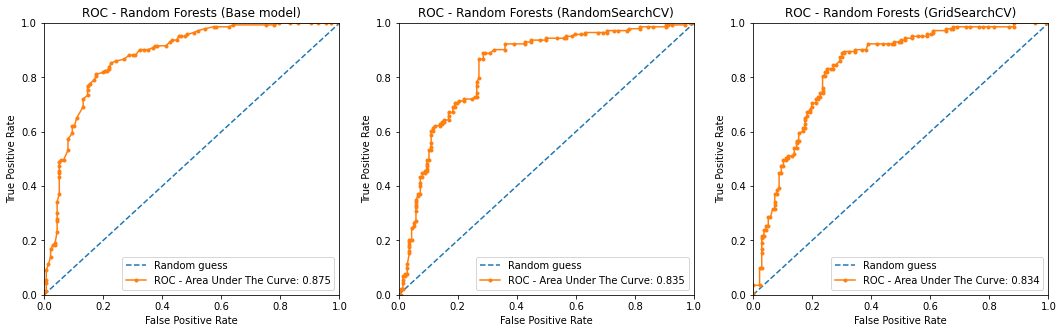

In [85]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

plot_rocs(y_smote_test, rfc_prob, ROC_area_rfc, 
          ax[0], 'ROC - Random Forests (Base model)')

plot_rocs(y_smote_test, random_search_rfc_prob, ROC_area_random_search_rfc,
          ax[1], 'ROC - Random Forests (RandomSearchCV)')

plot_rocs(y_smote_test, grid_search_rfc_prob, ROC_area_grid_search_rfc, 
          ax[2], 'ROC - Random Forests (GridSearchCV)')

<h3>Saving Best Model</h3>

In [86]:
pickle.dump(forest,open('best_model.sav','wb'))

<h2>Test Data</h2>

In [87]:
loan_test_df=pd.read_csv('test.csv')
loan_test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [88]:
loan_test_df = loan_test_df.drop(['Loan_ID'], axis=1)
loan_test_df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [89]:
loan_test_df.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [90]:
loan_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [91]:
loan_test_df.Gender = loan_test_df.Gender.replace({"Male": 1, "Female" : 0})
loan_test_df.Married = loan_test_df.Married.replace({"Yes": 1, "No" : 0})
loan_test_df.Self_Employed = loan_test_df.Self_Employed.replace({"Yes": 1, "No" : 0})


In [92]:
loan_test_df['Gender'].fillna(loan_test_df['Gender'].mode()[0], inplace=True)
loan_test_df['Dependents'].fillna(loan_test_df['Dependents'].mode()[0], inplace=True)
loan_test_df['Self_Employed'].fillna(loan_test_df['Self_Employed'].mode()[0], inplace=True)
loan_test_df['LoanAmount'].fillna(loan_test_df['LoanAmount'].mean(), inplace=True)
loan_test_df['Credit_History'].fillna(loan_test_df['Credit_History'].mean(), inplace=True)
loan_test_df['Credit_History'] = loan_test_df['Credit_History'].astype(int)
loan_test_df['Gender']=loan_test_df['Gender'].astype(int)


In [93]:
EncodedFeatures=['Property_Area','Education','Dependents']
le = LabelEncoder()
for feature in EncodedFeatures:
    loan_test_df[feature]=le.fit_transform(loan_test_df[feature])

In [94]:
loan_test_df.loc[(loan_test_df['Loan_Amount_Term'] >= 180), 'loan_term_dummy'] = 1
loan_test_df.loan_term_dummy.fillna(0,inplace=True)
loan_test_df['loan_term_dummy'].fillna(loan_test_df['loan_term_dummy'].mean(), inplace=True)
loan_test_df['loan_term_dummy']=loan_test_df['loan_term_dummy'].astype(int)
loan_test_df = loan_test_df.drop(['Loan_Amount_Term'], axis=1)

In [95]:
loan_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    float64
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Credit_History     367 non-null    int64  
 9   Property_Area      367 non-null    int64  
 10  loan_term_dummy    367 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 31.7 KB


In [96]:
loan_test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,loan_term_dummy
0,1,1,0,0,0.0,5720,0,110.0,1,2,1
1,1,1,1,0,0.0,3076,1500,126.0,1,2,1
2,1,1,2,0,0.0,5000,1800,208.0,1,2,1
3,1,1,2,0,0.0,2340,2546,100.0,0,2,1
4,1,0,0,1,0.0,3276,0,78.0,1,2,1


In [97]:
loan_test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
loan_term_dummy      0
dtype: int64

<h3>Save the cleaned test data for predctions</h3>

In [98]:
loan_test_df.to_pickle('cleaned_data_loan_test.pkl')
loaded_test_data=pickle.load(open('cleaned_data_loan_test.pkl','rb'))
# load the model from disk
loaded_model = pickle.load(open('best_model.sav', 'rb')) # rb means read as binary
result = loaded_model.score(X_smote_test, y_smote_test)
print(result)


0.8100358422939068


<h3> Using the pickle loaded model, we can predict on our test data<h3>

In [101]:
print("The predictions are")
test_x=loaded_test_data[['Gender','Married', 'Dependents', 'Education', 'Self_Employed','CoapplicantIncome','ApplicantIncome', 'LoanAmount','Credit_History', 'Property_Area', 'loan_term_dummy']]
pd.DataFrame(test_x)
test_x['Loan_Status']=loaded_model.predict(test_x)
test_x.head()


The predictions are


/Users/Tam/Desktop/DataScience/.venv/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/var/folders/fv/zl_dvtsn4x57c179jbjfbl4c0000gp/T/ipykernel_1654/3412325892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['Loan_Status']=loaded_model.predict(test_x)


,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History,Property_Area,loan_term_dummy,Loan_Status
0,1,1,0,0,0.0,0,5720,110.0,1,2,1,1
1,1,1,1,0,0.0,1500,3076,126.0,1,2,1,0
2,1,1,2,0,0.0,1800,5000,208.0,1,2,1,0
3,1,1,2,0,0.0,2546,2340,100.0,0,2,1,0
4,1,0,0,1,0.0,0,3276,78.0,1,2,1,1
